In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Notebook

This notebook is used for visualizing the data


In [16]:
import pandas as pd
import numpy as np
import mne
import os
import matplotlib.pyplot as plt

In [1]:
from neuroguard.commons.constant import DATASETS_FOLDER
from neuroguard.data.data_loader.eeg_data_extractor import EEGDataExtractor

In [ ]:
DATA_DIR = f"{DATASETS_FOLDER}/Real/"

extractor = EEGDataExtractor(data_dir=DATA_DIR, lfreq=10, notch_filter=[50,100])
eeg_df, participants_info = extractor.extract_dataframe()

In [19]:
eeg_df['participant_id'] = eeg_df['participant_id'].replace("11_raw", "1").replace('12_raw', '1').replace('21_raw', '2').replace('22_raw', '2')

In [ ]:
eeg_df

In [21]:
eeg_df.iloc[1].epoch

array([[ 6.33911792e-07, -1.35378035e-06, -3.01606312e-06, ...,
        -1.78986976e-05, -1.79483378e-05, -1.57222821e-05],
       [ 1.80761086e-06,  1.11001138e-06, -1.16799411e-06, ...,
        -1.73241545e-05, -1.97492091e-05, -1.95471737e-05],
       [ 1.46641656e-06, -7.70797387e-07, -1.78501146e-06, ...,
        -1.20590048e-05, -1.43241113e-05, -1.34550457e-05],
       ...,
       [ 8.71843973e-07, -2.13911857e-06, -2.78806076e-06, ...,
        -1.51314934e-05, -1.44625049e-05, -1.20130507e-05],
       [ 5.63218578e-06,  3.82643985e-06,  1.24221309e-06, ...,
        -1.43886838e-05, -1.22909099e-05, -1.10601865e-05],
       [ 9.22550829e-07,  5.64617699e-07, -5.43548969e-07, ...,
        -1.23936465e-05, -1.47654859e-05, -1.49707066e-05]])

In [22]:
def visualize_full_epoch(eeg_df, idx=0, title=None):
    epoch = eeg_df.iloc[idx].epoch
    plots = len(epoch)
    x = np.arange(len(epoch[0]))
    fig,axs = plt.subplots(plots,1, sharex=True, figsize=(10,40))
    for ax in axs:
        ax.plot(x, epoch[idx])
    if title is not None:
        fig.suptitle(title)
    plt.show()

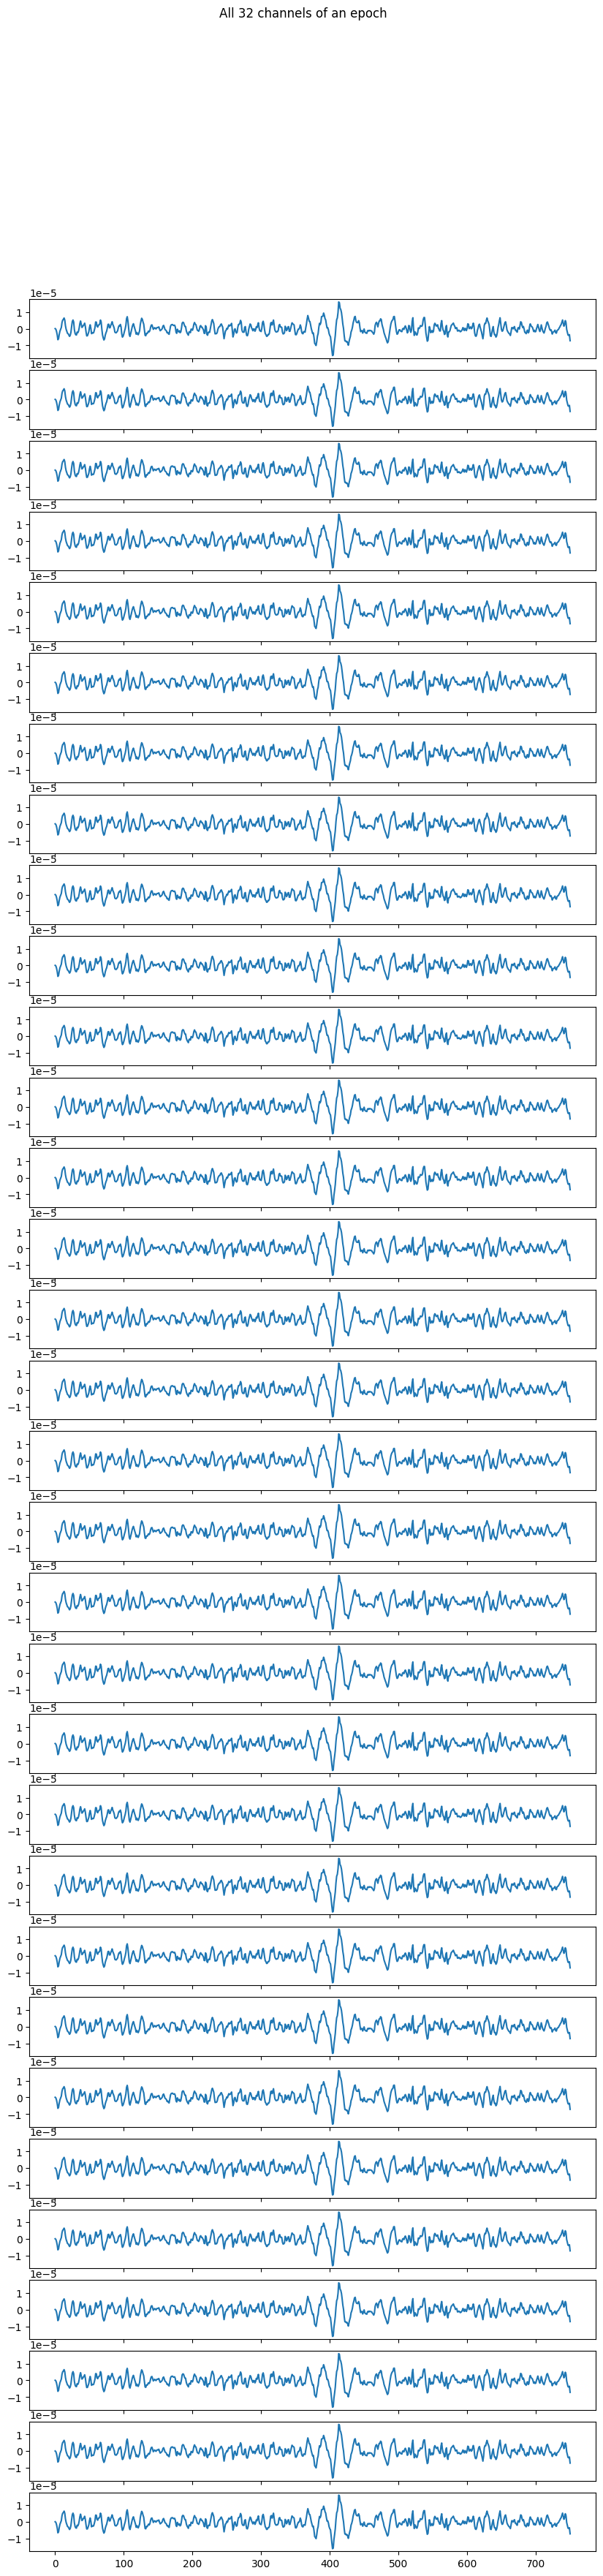

In [23]:
visualize_full_epoch(eeg_df, idx=30, title=f"All 32 channels of an epoch")

In [24]:
def visualize_single_epoch_average(eeg_df, idx=0, title=None):
    epoch = eeg_df.iloc[idx].epoch
    avg_epoch = np.mean(epoch, axis=0)
    fig,ax = plt.subplots(1,1, sharex=True, figsize=(10,5))
    x = np.arange(len(avg_epoch))
    ax.plot(x, avg_epoch)
    if title is not None:
        fig.suptitle(title)

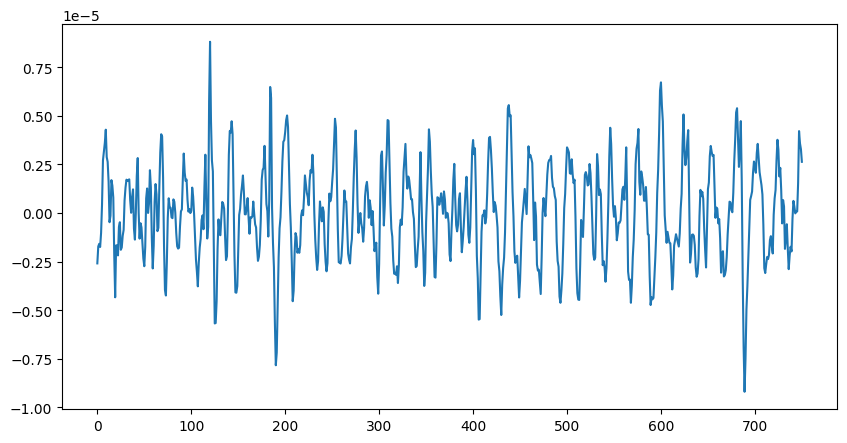

In [25]:
visualize_single_epoch_average(eeg_df, idx=15)

In [ ]:
participant_df = eeg_df[eeg_df['participant_id'] == '2']
participant_df.reset_index(drop=True)

In [27]:
def plot_multiple_epoch_average(eeg_df, participant, start_idx=0, end_idx=None, title=None):
    participant_df = eeg_df[eeg_df['participant_id'] == participant].reset_index(drop=True)
    
    concatenated = np.concatenate(participant_df['epoch'], axis=1)
    avg_concatenated = np.mean(concatenated, axis=0)
    
    if end_idx is None:
        end_idx = len(avg_concatenated)
    x = np.arange(start_idx, end_idx)
    fig, ax = plt.subplots(1,1, sharex=True, figsize=(15,5))
    ax.plot(x, avg_concatenated[start_idx:end_idx])
    if title is not None:
        fig.suptitle(title)
    plt.show()

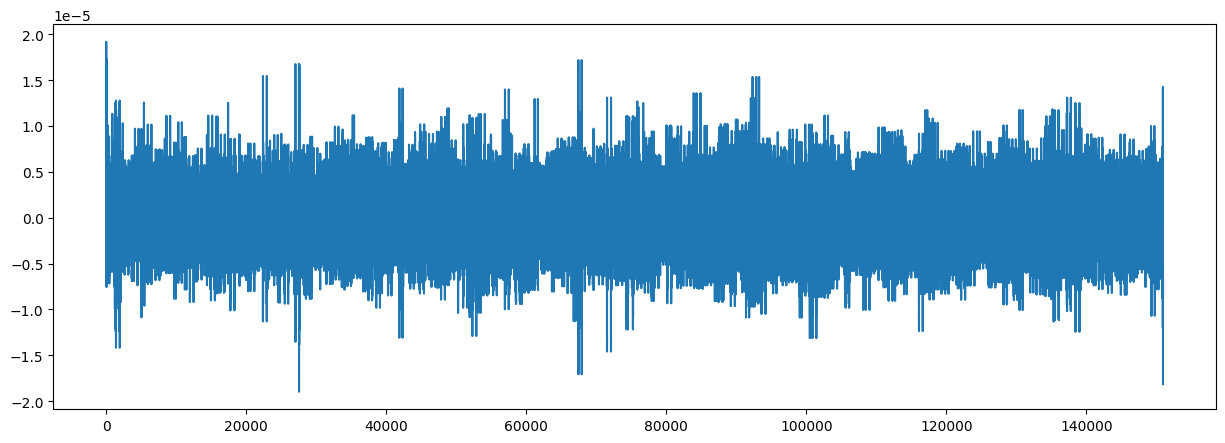

In [28]:
plot_multiple_epoch_average(eeg_df,'1')